# Additive model

I implemented the additive model described in the [GCTA](http://cnsgenomics.com/software/gcta/Simu.html). The phenotype or individual *j*, *y<sub>j</sub>*, is:

$$ y_j = \sum\nolimits_i w_{ij} u_i + e_j$$

Where:

- The weight w<sub>ij</sub> is 

    $$ w_{ij} = \frac{x_{ij} - 2p_i}{\sqrt{2p_i(1 - p_i)}}$$ 

    where
    - x<sub>ij</sub> is the number of reference alleles for the i-th causal variant of the j-th individual.
    - p<sub>i</sub> is the frequency of the i-th causal variant.
- The allelic effect of the i-th causal variant u<sub>i</sub> in arbitrary units.
- e<sub>j</sub> is the residual effect, the proportion of the trait not attributable to the genotype. It depends on heritability. We generate it from a normal distribution with mean of 0 and variance of 

    $$ \frac{1}{h^2 - 1} var(\sum\nolimits_i w_{ij} u_i)$$

    (We take the variance of the genetic effect and add the proportion that is not due to it.) When all variance is due to genetics (h<sup>2</sup> = 1), e<sub>j</sub> = 0 for any case.

# Weight

Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Warning message:
“Removed 2 rows containing missing values (geom_point).”

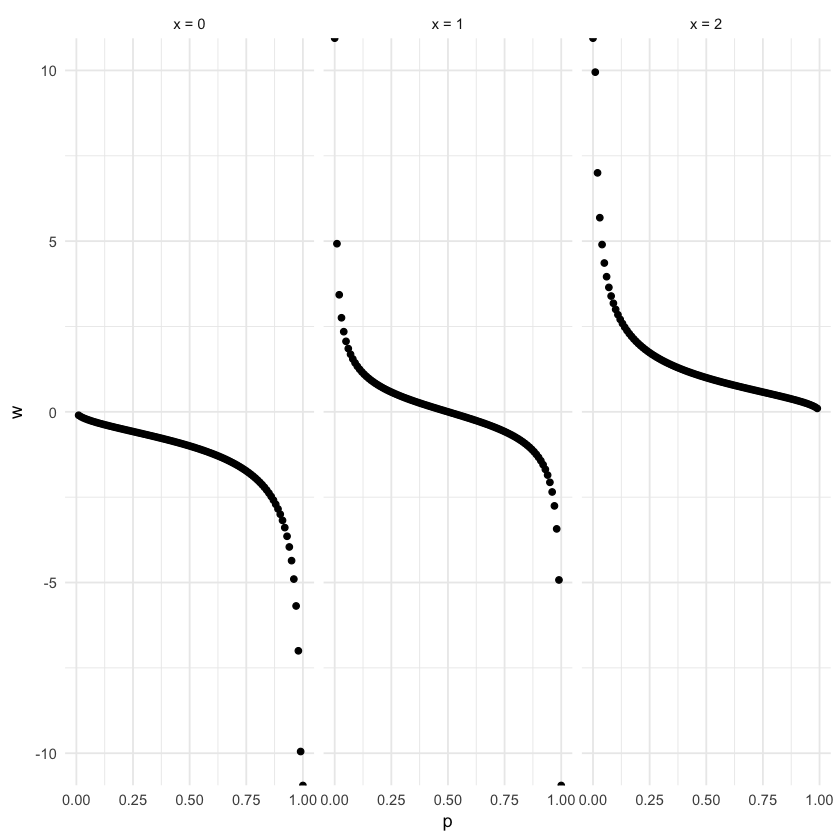

In [1]:
library(ggplot2)
library(tidyverse)

getW <- function(x, p){
    (x-2*p)/(2*sqrt(p*(1-p)))
}

# get 100 frequencies of the causal allele
data.frame(p = seq(0,1,0.01)) %>%
    mutate(x2 = getW(2, p), x1 = getW(1, p), x0 = getW(0, p)) %>%
    gather(xi, w, x0:x2) %>%
    mutate(xi = gsub("x", "x = ", xi)) %>%
    ggplot(aes(x = p, y = w)) +
        geom_point() +
        facet_grid(.~xi) +
        theme_minimal()

The rarer an allele is, the stronger the effect it produces is. It follows a sigmoid shape.